<a href="https://colab.research.google.com/github/Mouryachowdaryy/Jon-snow/blob/main/imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib


In [ ]:
!pip install kaggle


In [ ]:
# Create a directory for the Kaggle key
!mkdir -p ~/.kaggle

# Move the kaggle.json file to this directory
!mv kaggle.json ~/.kaggle/

# Set permissions for the key
!chmod 600 ~/.kaggle/kaggle.json

# Download the CIFAR-10 dataset
!kaggle datasets download -d kraiso/cifar-10

# Unzip the downloaded dataset
!unzip CIFAR-10.zip -d cifar-10


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open CIFAR-10.zip, CIFAR-10.zip.zip or CIFAR-10.zip.ZIP.


In [ ]:
import tensorflow as tf
import numpy as np

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Verify the data
print("✅ Data Loaded and Normalized\n")
print("Training images shape :", train_images.shape)
print("Training labels shape :", train_labels.shape)
print("Test images shape     :", test_images.shape)
print("Test labels shape     :", test_labels.shape)

# Optional: Check a few unique labels
print("\nSample training labels:", np.unique(train_labels[:10]))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
✅ Data Loaded and Normalized

Training images shape : (50000, 32, 32, 3)
Training labels shape : (50000, 1)
Test images shape     : (10000, 32, 32, 3)
Test labels shape     : (10000, 1)

Sample training labels: [1 2 3 4 6 7 8 9]


In [ ]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


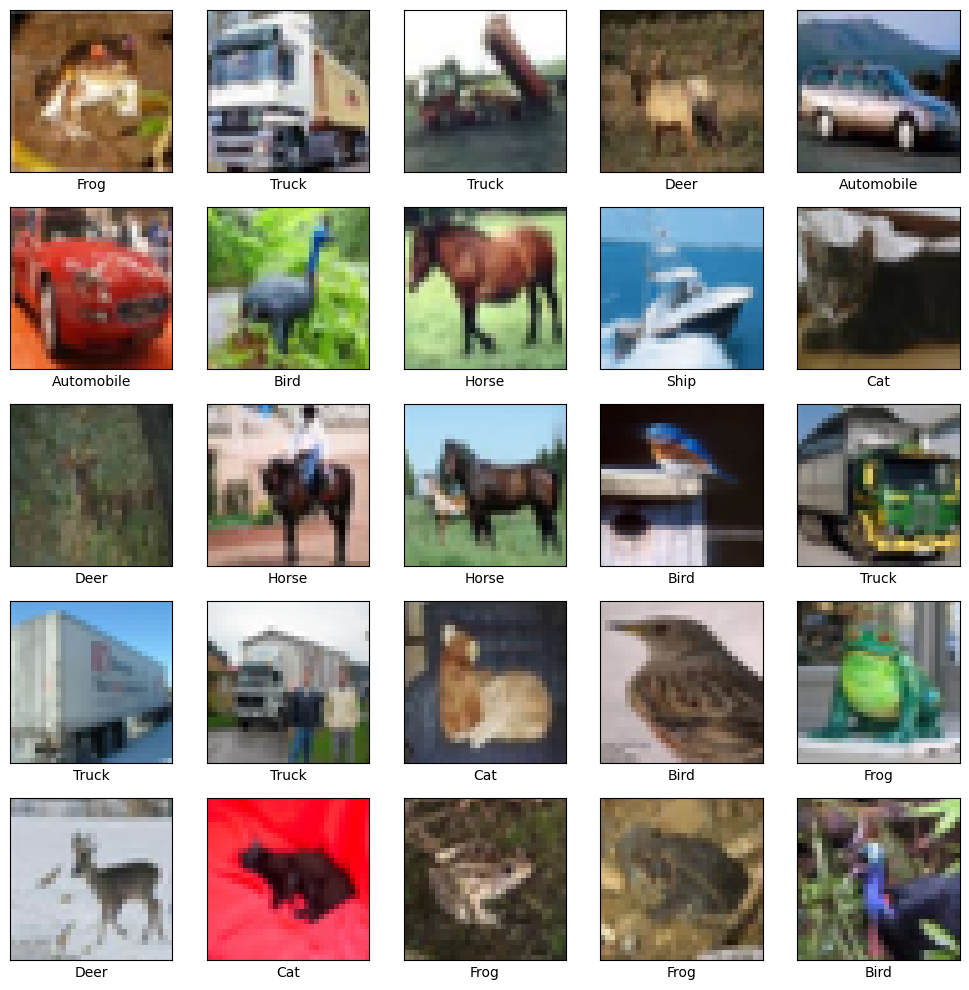

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])  # Color images don't need cmap
    label = train_labels[i][0]  # Get integer label
    plt.xlabel(class_names[label])  # Show class name
plt.tight_layout()
plt.show()


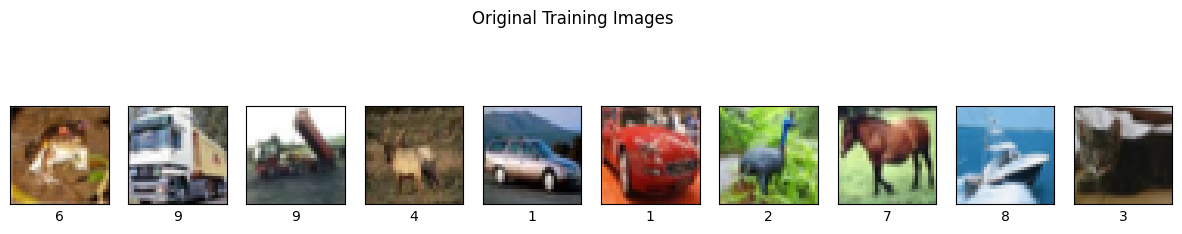

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Visualize the data before preprocessing
def plot_images(images, labels, title, num_images=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i][0])
    plt.suptitle(title)
    plt.show()

plot_images(train_images, train_labels, "Original Training Images")


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0


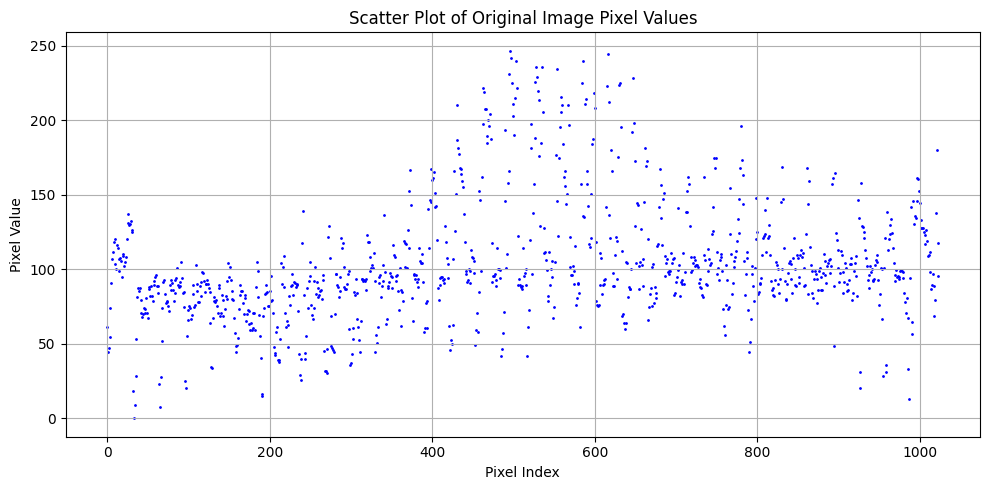

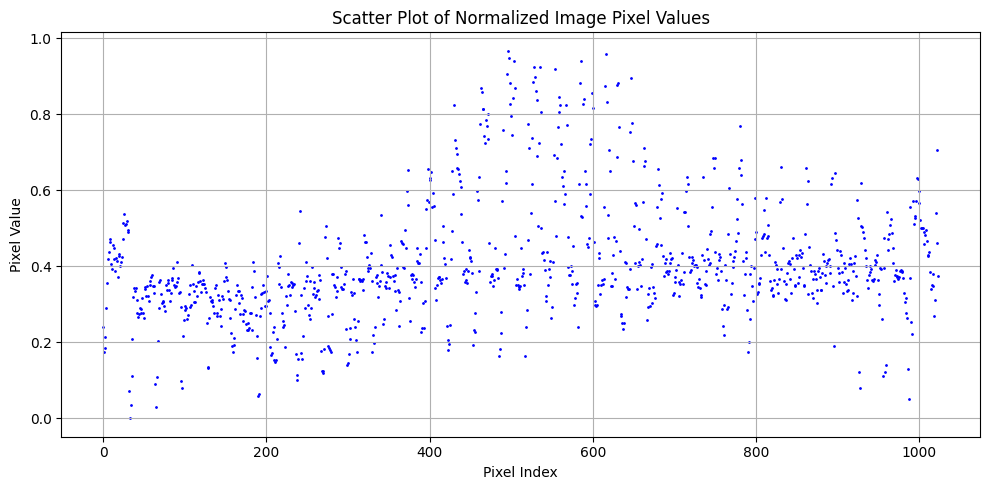

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize pixel values in scatter plot
def plot_scatter(images, title, index=0):
    """
    Plots a scatter plot of pixel values for a single image.

    Parameters:
        images: numpy array of shape (num_images, height, width[, channels])
        title: title for the plot
        index: index of the image to plot
    """
    sample_image = images[index]

    # Convert to grayscale if RGB
    if sample_image.ndim == 3:
        sample_image = sample_image.mean(axis=2)  # average across channels

    x = np.arange(sample_image.size)
    y = sample_image.flatten()

    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, s=1, c='blue')
    plt.title(title)
    plt.xlabel('Pixel Index')
    plt.ylabel('Pixel Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example use (ensure these variables are defined earlier in your script)
plot_scatter(train_images, "Scatter Plot of Original Image Pixel Values", index=0)
plot_scatter(train_images_normalized, "Scatter Plot of Normalized Image Pixel Values", index=0)


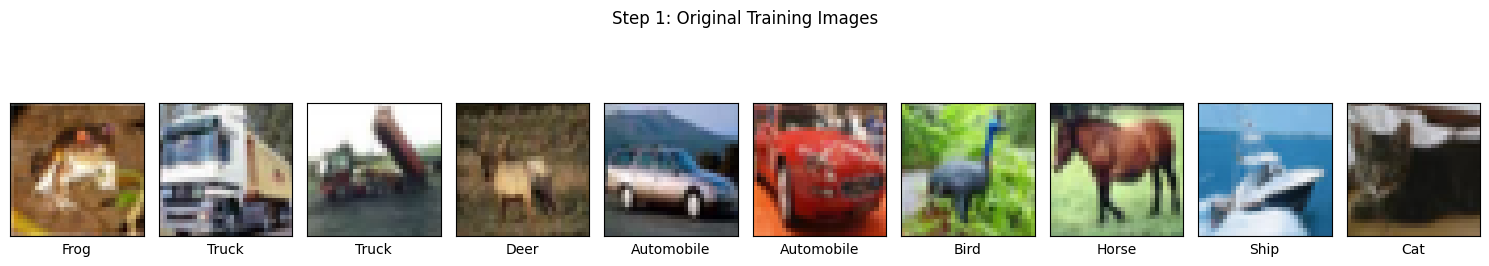

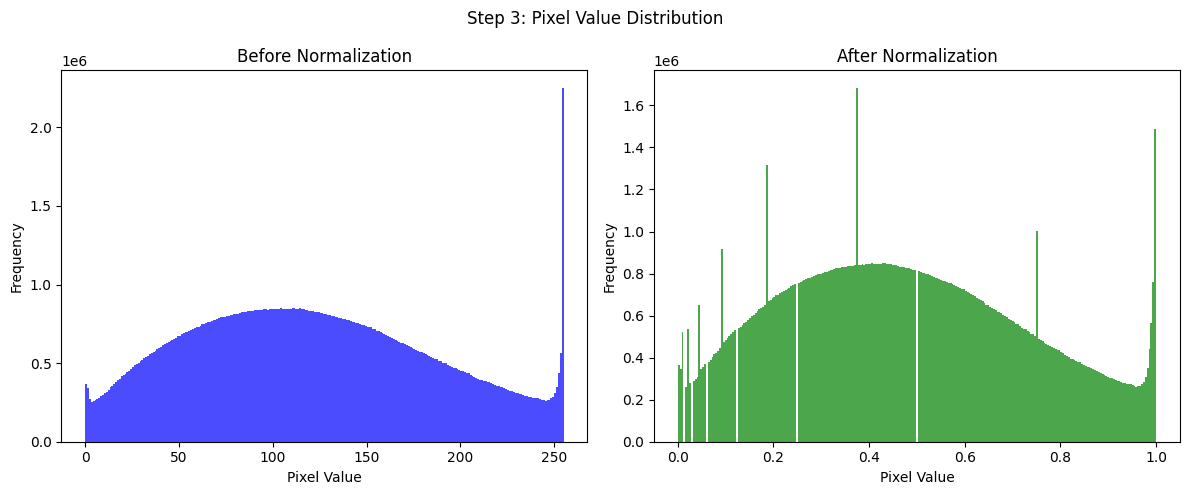

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Step 1: Visualize raw images
def plot_images(images, labels, title, num_images=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.imshow(images[i])  # Show in color
        label = labels[i][0]
        plt.xlabel(class_names[label])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_images(train_images, train_labels, "Step 1: Original Training Images")

# Step 2: Normalize pixel values to [0, 1]
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

# Step 3: Histogram of pixel values
def plot_histograms(original_images, normalized_images, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(original_images.ravel(), bins=255, color='blue', alpha=0.7)
    plt.title('Before Normalization')
    plt.xlabel('Pixel Value'); plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(normalized_images.ravel(), bins=255, color='green', alpha=0.7)
    plt.title('After Normalization')
    plt.xlabel('Pixel Value'); plt.ylabel('Frequency')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_histograms(train_images, train_images_normalized, "Step 3: Pixel Value Distribution")


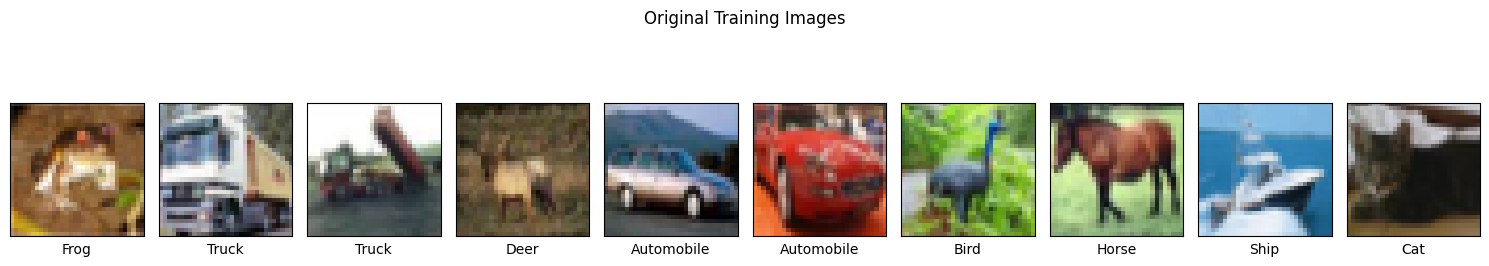

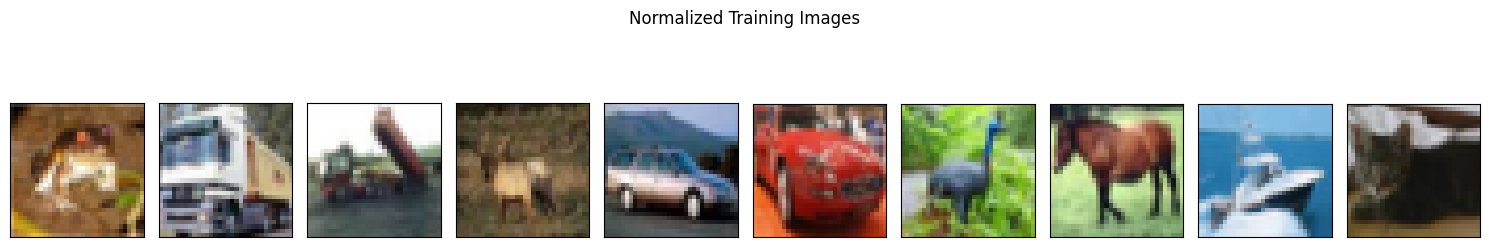

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Step 1: Visualize images before preprocessing with labels
def plot_images_before(images, labels, title, num_images=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.imshow(images[i])  # Show color images as is
        label = labels[i][0]
        plt.xlabel(class_names[label])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Step 2: Visualize images after preprocessing (no labels)
def plot_images_after(images, title, num_images=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.imshow(images[i])  # normalized images still shown in color
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Step 3: Normalize pixel values to [0,1]
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

# Step 4: Plot images before preprocessing
plot_images_before(train_images, train_labels, title="Original Training Images")

# Step 5: Plot images after preprocessing
plot_images_after(train_images_normalized, title="Normalized Training Images")


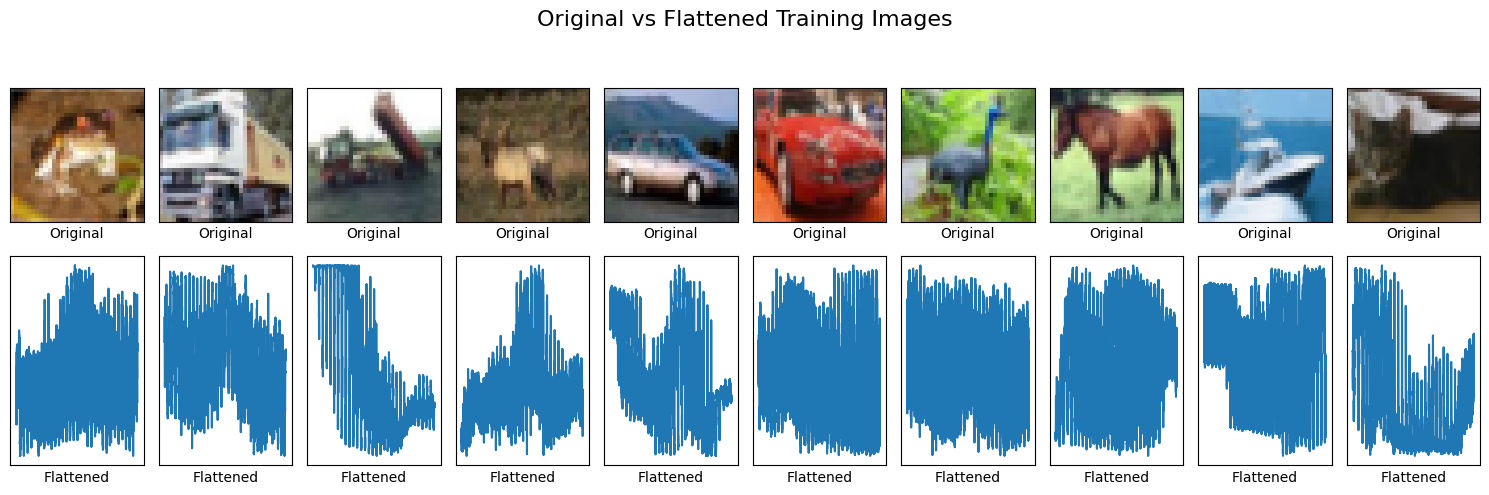

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the normalized images for MLP input
train_images_flattened = train_images_normalized.reshape(train_images_normalized.shape[0], -1)
test_images_flattened = test_images_normalized.reshape(test_images_normalized.shape[0], -1)

# Function to plot original and flattened images side by side
def plot_flattened_images(flattened_images, original_images, title, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(original_images[i])
        plt.xlabel("Original")

        # Flattened image as line plot
        plt.subplot(2, num_images, num_images + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.plot(flattened_images[i])
        plt.xlabel("Flattened")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot flattened training images with original images
plot_flattened_images(train_images_flattened, train_images, title="Original vs Flattened Training Images")


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Print original shapes
print("Original Training data shape:", train_images.shape)
print("Original Training labels shape:", train_labels.shape)
print("Original Test data shape:", test_images.shape)
print("Original Test labels shape:", test_labels.shape)

# Normalize images to [0,1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
num_classes = 10
train_labels_cat = to_categorical(train_labels, num_classes)
test_labels_cat = to_categorical(test_labels, num_classes)

# Print shapes after preprocessing
print("\nAfter preprocessing:")
print("Training images shape:", train_images.shape)
print("Training labels (one-hot) shape:", train_labels_cat.shape)
print("Test images shape:", test_images.shape)
print("Test labels (one-hot) shape:", test_labels_cat.shape)


Original Training data shape: (50000, 32, 32, 3)
Original Training labels shape: (50000, 1)
Original Test data shape: (10000, 32, 32, 3)
Original Test labels shape: (10000, 1)

After preprocessing:
Training images shape: (50000, 32, 32, 3)
Training labels (one-hot) shape: (50000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels (one-hot) shape: (10000, 10)


In [ ]:
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)


Shape of train_labels: (50000, 1)
Shape of test_labels: (10000, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming train_labels and test_labels are loaded integer labels

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)  # e.g. (50000, 10)
print(test_labels.shape)   # e.g. (10000, 10)


(50000, 10)
(10000, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (use few epochs for quick test)
model.fit(train_images, train_labels, epochs=3, validation_split=0.1)

# Save the trained model
model.save("my_model.h5")
print("Model saved successfully.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.3574 - loss: 1.7540 - val_accuracy: 0.5662 - val_loss: 1.2481
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.5690 - loss: 1.2250 - val_accuracy: 0.6256 - val_loss: 1.0845
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6300 - loss: 1.0622 - val_accuracy: 0.6488 - val_loss: 1.0246


Model saved successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("my_model.h5")
print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Step 2: Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 3: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_split=0.1, verbose=1)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Step 7: Save the model
model.save("cifar10_cnn_model.h5")
print("Model saved successfully as 'cifar10_cnn_model.h5'")


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 79ms/step - accuracy: 0.2602 - loss: 1.9743 - val_accuracy: 0.4504 - val_loss: 1.5094
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.4505 - loss: 1.5137 - val_accuracy: 0.5556 - val_loss: 1.2514
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.5129 - loss: 1.3695 - val_accuracy: 0.5942 - val_loss: 1.1371
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.5567 - loss: 1.2469 - val_accuracy: 0.6128 - val_loss: 1.0925
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.5862 - loss: 1.1754 - val_accuracy: 0.6564 - val_loss: 0.9970
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.6072 - loss: 1.1170 - val_accuracy: 0.6606 - val_loss: 0.9714
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.6280 - loss: 1.0664 - val_accuracy: 0.6718 - val_loss: 0.9493
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6492 - loss: 1.0071 - 


Test Accuracy: 0.6624
Test Loss: 0.9783
Model saved successfully as 'cifar10_cnn_model.h5'


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Step 1: Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Step 2: Normalize images
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

# Step 3: One-hot encode labels
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)

# Step 4: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(
    train_images_normalized, train_labels_one_hot,
    epochs=20,
    batch_size=64,
    validation_data=(test_images_normalized, test_labels_one_hot),
    verbose=1
)

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(test_images_normalized, test_labels_one_hot)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# Step 8: Save the model
model.save('cnn_cifar10_model.h5')
print("\n✅ Model saved successfully as 'cnn_cifar10_model.h5'")


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.2655 - loss: 1.9519 - val_accuracy: 0.4995 - val_loss: 1.4031
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.4622 - loss: 1.4804 - val_accuracy: 0.5649 - val_loss: 1.2206
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.5276 - loss: 1.3201 - val_accuracy: 0.5799 - val_loss: 1.1665
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.5663 - loss: 1.2285 - val_accuracy: 0.5993 - val_loss: 1.1125
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5966 - loss: 1.1520 - val_accuracy: 0.6166 - val_loss: 1.0842
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6157 - loss: 1.0943 - val_accuracy: 0.6547 - val_loss: 0.9813
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.6386 - loss: 1.0302 - val_accuracy: 0.6728 - val_loss: 0.9350
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 81ms/step - accuracy: 0.6535 - loss: 0.9991 - 


✅ Test Accuracy: 0.7199
✅ Test Loss: 0.8449

✅ Model saved successfully as 'cnn_cifar10_model.h5'


Saving dog.jpg to dog.jpg

📁 Uploaded file: dog.jpg


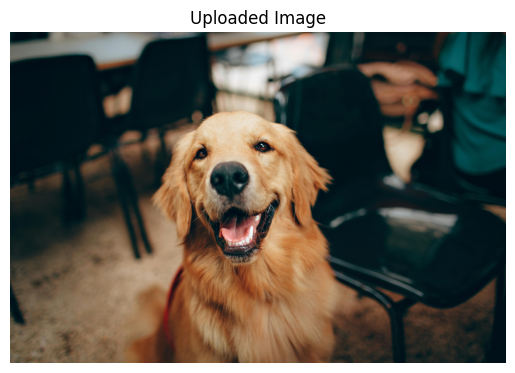

✅ Predicted Class: **dog** (79.97% confidence)


In [ ]:
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model

# Load trained model
model = load_model('cnn_cifar10_model.h5')

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess uploaded image
def preprocess_image(image_data):
    image = Image.open(io.BytesIO(image_data)).convert('RGB')  # Ensure RGB
    image = image.resize((32, 32))
    image = np.array(image) / 255.0
    image = image.reshape(1, 32, 32, 3)
    return image

# Predict the class
def predict_image(image_data):
    image = preprocess_image(image_data)
    prediction = model.predict(image, verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    return class_names[predicted_class], confidence

# Upload and classify image
def handle_upload():
    uploaded = files.upload()
    for file_name, file_data in uploaded.items():
        print("\n📁 Uploaded file:", file_name)
        image = Image.open(io.BytesIO(file_data))
        plt.imshow(image)
        plt.axis('off')
        plt.title("Uploaded Image")
        plt.show()

        predicted_class, confidence = predict_image(file_data)
        print(f"✅ Predicted Class: **{predicted_class}** ({confidence:.2f}% confidence)")

# Call the upload function
handle_upload()


Saving horse.jpg to horse.jpg
📁 Uploaded file: horse.jpg


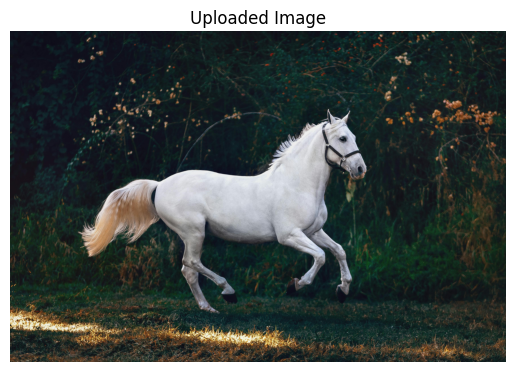

✅ Predicted Class: horse (99.66% confidence)


In [ ]:
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess uploaded image
def preprocess_image(image_data):
    image = Image.open(io.BytesIO(image_data)).convert('RGB')  # Force RGB (CIFAR-10 uses RGB)
    image = image.resize((32, 32))                              # Resize to model input shape
    image = np.array(image) / 255.0                             # Normalize pixel values
    image = image.reshape(1, 32, 32, 3)                          # Shape: (1, 32, 32, 3)
    return image

# Predict the class
def predict_image(image_data):
    image = preprocess_image(image_data)
    prediction = model.predict(image, verbose=0)
    predicted_class_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    return class_names[predicted_class_index], confidence

# Upload image and display result
def handle_upload():
    uploaded = files.upload()
    for file_name, file_data in uploaded.items():
        print("📁 Uploaded file:", file_name)
        image = Image.open(io.BytesIO(file_data))
        plt.imshow(image)
        plt.axis('off')
        plt.title("Uploaded Image")
        plt.show()

        predicted_class, confidence = predict_image(file_data)
        print(f"✅ Predicted Class: {predicted_class} ({confidence:.2f}% confidence)")

# Call the upload and prediction function
handle_upload()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.save('cnn_cifar10_model.h5')
print("Model saved as cnn_cifar10_model.h5")


Model saved as cnn_cifar10_model.h5


In [ ]:
# Install TensorFlow
!pip install tensorflow --quiet

from IPython.display import display, HTML
from google.colab import output
import base64
import io
import numpy as np
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array

# Load pre-trained MobileNetV2
model = MobileNetV2(weights='imagenet')

# Define prediction function
def predict_image(base64_img):
    image_data = base64.b64decode(base64_img)
    image = Image.open(io.BytesIO(image_data)).convert("RGB").resize((224, 224))

    x = img_to_array(image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    label = decode_predictions(preds, top=1)[0][0]

    class_name = label[1]
    confidence = label[2] * 100

    output_text = f"<b>✅ Predicted Class:</b> {class_name} ({confidence:.2f}%)"
    output.eval_js(f'document.getElementById("result").innerHTML = `{output_text}`')

# Register the callback
output.register_callback('notebook.predict_image', predict_image)

# Display HTML UI
html_code = """
<h3>📷 Upload an Image to Classify</h3>
<input type="file" id="upload" accept="image/*">
<br><br>
<div id="preview"></div>
<p id="result">🔍 Waiting for image...</p>

<script>
  const upload = document.getElementById('upload');
  const preview = document.getElementById('preview');
  upload.onchange = () => {
    const file = upload.files[0];
    const reader = new FileReader();
    reader.onload = function() {
      const imgTag = `<img src="${reader.result}" style="max-height:200px;"><br><b>🔍 Predicting...</b>`;
      preview.innerHTML = imgTag;
      google.colab.kernel.invokeFunction('notebook.predict_image', [reader.result.split(',')[1]], {});
    };
    reader.readAsDataURL(file);
  };
</script>
"""

display(HTML(html_code))


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
